## Time Series Analysis: Home Assignment 1

due to **11.02.21 23:00**

You need to upload HA1 to github repository,  the link will be provided later.

Enter your name below: 

In [1]:
name='Rao Zhiqiang' 

### Contents

1. **Data preparation (7 points)**

    $1.0$ Download data and import functions
    
    $1.1$ Read data (1 pt.)
    
    $1.2$ Check NAs (1 pt.)
    
    $1.3$ Transform dates (2 pt.)
    
    $1.4$. Make some plots (0.75 pt.)
    
    $1.5$ Split the data (0.75 pt.)
    
 
2. **ETS (7 points)**

    $2.1$ Estimate ETS (1 pt.)
    
    $2.2$ Point forecasts (1 pt.)
    
    $2.3$ Interval forecasts 1 (1 pt.)
    
    $2.4$ Interval forecasts 2 (1 pt.)
    
    $2.5$ Forecast quality metrics (2 pt.)
    
    $2.6$ Model comparison (1 pt.)
    

## 1. Data preparation (7 pt.)

### 1.0 Download data and import functions
[back to contents](#Contents)

You have to download [BI_TSA_HA_1_data.csv](https://github.com/bdemeshev/ts603/blob/master/2021-spring/BI_TSA_HA_1_data.csv), which represents quarterly sales of Walmart from 1984 to 2020. The sourse of the data is [ycharts.com](https://ycharts.com/companies/WMT/revenues). 

In [2]:
import pandas as pd
import numpy as np
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import  mean_absolute_error, mean_squared_error
import sklearn

### 1.1 Read data (1 pt.)
[back to contents](#Contents)

Read the downloaded data from your local computer and name it ``` df ```

Alternatively, you can skip 1.0 and access data directly putting ```'https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv'``` inside ```read_csv```

use ``` pd.read_csv('... .csv') ```

In [3]:
#code here (1 pt.)

import pandas as pd
df = pd.read_csv('https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv')
print(df)

       sales  month  day  year
0    134.710     10   31  2020
1    137.740      7   31  2020
2    134.620      4   30  2020
3    141.670      1   31  2020
4    127.990     10   31  2019
..       ...    ...  ...   ...
142    1.656      4   30  1985
143    2.074      1   31  1985
144    1.584     10   31  1984
145    1.508      7   31  1984
146    1.235      4   30  1984

[147 rows x 4 columns]


### 1.2 Check NAs (1 pt.)
[back to contents](#Contents)

Check whether ``` df ``` contains missing values(NAs):

apply ``` isna().value_counts() ``` to ``` df ```

In [4]:
# code here (0.5 pt.)

print(df.isna())

     sales  month    day   year
0    False  False  False  False
1    False  False  False  False
2    False  False  False  False
3    False  False  False  False
4    False  False  False  False
..     ...    ...    ...    ...
142  False  False  False  False
143  False  False  False  False
144  False  False  False  False
145  False  False  False  False
146  False  False  False  False

[147 rows x 4 columns]


How many missing values are there in ``` df ```?

In [5]:
# answer (0.5 pt.)

print(df.isna().value_counts())

print()

print("there is no missing values in df")
print('amount of missing values = 0')

sales  month  day    year 
False  False  False  False    147
dtype: int64

there is no missing values in df
amount of missing values = 0


### 1.3 Dates transformation (2 pt.)
[back to contents](#Contents)

How are dates represented in the original dataset? 

In [6]:
# answer (0.5 pt.)

print(df.count() )

print()

print('there are 147 dates represented in original datase')

sales    147
month    147
day      147
year     147
dtype: int64

there are 147 dates represented in original datase


Transform dates to datetime format:

``` df['date']=df['...']*10000+df['...']*100+df['...']*1 ```

``` df['date']=pd.to_datetime(df['date'], format='%Y%m%d') ```

change each ``` df['...'] ``` to one of ``` df['month'] ```, ``` df['year'] ```, ``` df['day'] ```according to ``` format='%Y%m%d'```

In [7]:
# code here (0.5 pt.)

df['date']=df['year']*10000+df['month']*100+df['day']*1
df['date']=pd.to_datetime(df['date'], format ='%Y%m%d')

Change index to dates:

``` df.index=.... ```

In [8]:
# code here (0.25 pt.)

df=df.set_index('date')

What is the size of the dataset?

use ```.shape```

In [9]:
# code here (0.25 pt.)

import numpy as np
np.shape([df])
print(df)


              sales  month  day  year
date                                 
2020-10-31  134.710     10   31  2020
2020-07-31  137.740      7   31  2020
2020-04-30  134.620      4   30  2020
2020-01-31  141.670      1   31  2020
2019-10-31  127.990     10   31  2019
...             ...    ...  ...   ...
1985-04-30    1.656      4   30  1985
1985-01-31    2.074      1   31  1985
1984-10-31    1.584     10   31  1984
1984-07-31    1.508      7   31  1984
1984-04-30    1.235      4   30  1984

[147 rows x 4 columns]


Drop columns ['day', 'year','month','date']:

```df=df.drop(..., axis=1)```

In [10]:
# code here (0.25 pt.)

df=df.drop('month',axis=1)
df=df.drop('day',axis=1)
df=df.drop('year',axis=1)

What is the size of the dataset now?

In [11]:
# code here (0.25 pt.)

np.shape([df])
print(df)

              sales
date               
2020-10-31  134.710
2020-07-31  137.740
2020-04-30  134.620
2020-01-31  141.670
2019-10-31  127.990
...             ...
1985-04-30    1.656
1985-01-31    2.074
1984-10-31    1.584
1984-07-31    1.508
1984-04-30    1.235

[147 rows x 1 columns]


### 1.4 Plot data (0.75 pt.)
[back to contents](#Contents)

transform data frame column to series:

```y=df['date']```

In [12]:
# code here (0.25 pt.)

y=df['sales']


```plot_series``` gets a series as an argument, whose dates sorted in ascending order.
Transform your time series by changing descending order to ascending order:

apply ```np.flip``` to ```y``` and name the result ```y```

In [13]:
# code here (0.25 pt.)

y=np.flip(y,0)

Plot the series using ```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

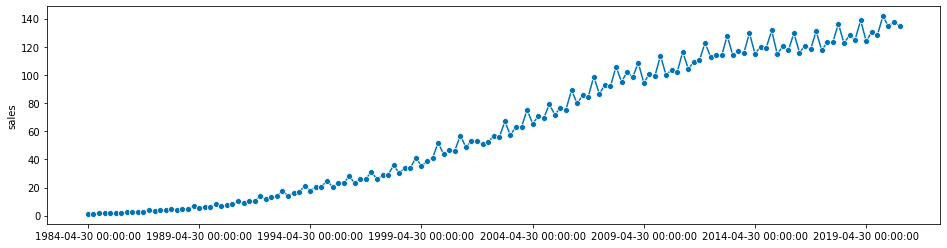

In [14]:
# code here (0.25 pt.)

plot_series(y)

### 1.5 Split data (0.75 pt.)
[back to contents](#Contents)

Split the data into train and test samples:

``` temporal_train_test_split(...) ```

choose ``` test_size=0.2 ```

In [15]:
# code here (0.5 pt.)

y_train, y_test = temporal_train_test_split(y,test_size=0.2)


plot train and test samples using ``` plot_series ```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

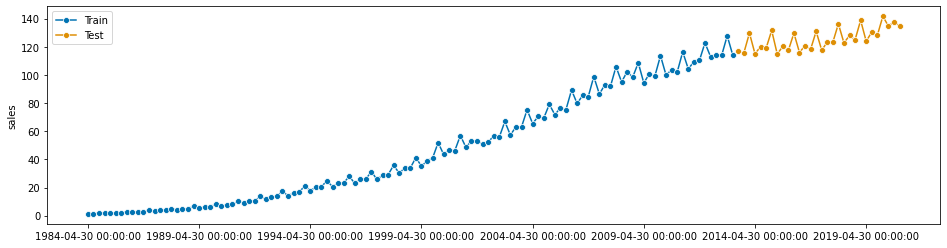

In [16]:
# code here (0.25 pt.)

plot_series(y_train,y_test,labels=['Train', 'Test'])

## 2. ETS (7 pt.)

### 2.1 Estimate ETS (MAA) and (AAM) (1 pt.)
[back to contents](#Contents)

Start with ETS (MAA). Estimate the model and name it ```model_MAA```:

```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_MAA=model_MAA.fit()```


In [17]:
# code here (0.5 pt.)

model_MAA = ETSModel(y_train, error='mul', trend='add', seasonal='add', seasonal_periods=4)
fit_MAA = model_MAA.fit()

/Users/ivan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


Estimate ETS (AAM) with the same characteristics:
    
```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_AAM=model_AAM.fit()```


In [18]:
# code here (0.5 pt.)

model_AAM = ETSModel(y_train, error='add', trend='add', seasonal='mul', seasonal_periods=4)
fit_AAM = model_AAM.fit()

/Users/ivan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


### 2.2 Point forecasts (1 pt.)
[back to contents](#Contents)

Obtain point forecasts for ETS(MAA) with forecasting horizon=30 quarters:

```fit_MAA.forecast(steps=...)```

In [19]:
# code here (0.25 pt.)

print(fit_MAA.forecast(steps=30))

2013-07-31    117.848870
2013-10-31    117.364671
2014-01-31    130.725436
2014-04-30    117.901780
2014-07-31    121.230477
2014-10-31    120.746277
2015-01-31    134.107043
2015-04-30    121.283386
2015-07-31    124.612083
2015-10-31    124.127884
2016-01-31    137.488649
2016-04-30    124.664993
2016-07-31    127.993690
2016-10-31    127.509490
2017-01-31    140.870256
2017-04-30    128.046599
2017-07-31    131.375296
2017-10-31    130.891097
2018-01-31    144.251862
2018-04-30    131.428206
2018-07-31    134.756903
2018-10-31    134.272703
2019-01-31    147.633469
2019-04-30    134.809813
2019-07-31    138.138509
2019-10-31    137.654310
2020-01-31    151.015075
2020-04-30    138.191419
2020-07-31    141.520116
2020-10-31    141.035916
Freq: Q-OCT, Name: simulation, dtype: float64


Obtain point forecasts for ETS(AAM) with forecasting horizon=30 quarters:

```fit_AAM.forecast(steps=...)```

In [20]:
# code here (0.25 pt.)

print(fit_AAM.forecast(steps=30))

2013-07-31    119.244364
2013-10-31    117.867119
2014-01-31    133.457367
2014-04-30    118.815450
2014-07-31    124.107352
2014-10-31    122.625427
2015-01-31    138.791223
2015-04-30    123.517139
2015-07-31    128.970339
2015-10-31    127.383736
2016-01-31    144.125079
2016-04-30    128.218828
2016-07-31    133.833327
2016-10-31    132.142044
2017-01-31    149.458936
2017-04-30    132.920517
2017-07-31    138.696315
2017-10-31    136.900352
2018-01-31    154.792792
2018-04-30    137.622206
2018-07-31    143.559303
2018-10-31    141.658661
2019-01-31    160.126648
2019-04-30    142.323894
2019-07-31    148.422290
2019-10-31    146.416969
2020-01-31    165.460505
2020-04-30    147.025583
2020-07-31    153.285278
2020-10-31    151.175278
Freq: Q-OCT, Name: simulation, dtype: float64


Plot both forecasts (AAM) and (MAA), test and train data

```plot_series()```

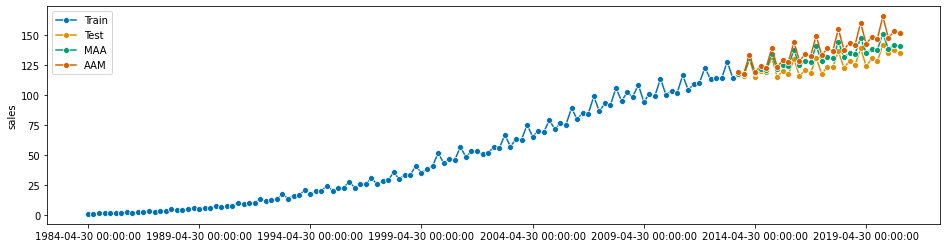

In [21]:
# code here (0.5 pt.)
plot_series(y_train, y_test,fit_MAA.forecast(steps=30), fit_AAM.forecast(steps=30),labels=['Train', 'Test', 'MAA','AAM']);

### 2.3 Interval forecasts ETS(MAA) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

```pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_MAA=pred_MAA.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```


In [22]:
# code here (0.5 pt.)

pred_MAA = fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31')

pred_MAA = pred_MAA.summary_frame(alpha=0.05)

upper_int = pred_MAA['pi_upper']
lower_int = pred_MAA['pi_lower']

Plot interval predictions:

```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='pi_upper'>)

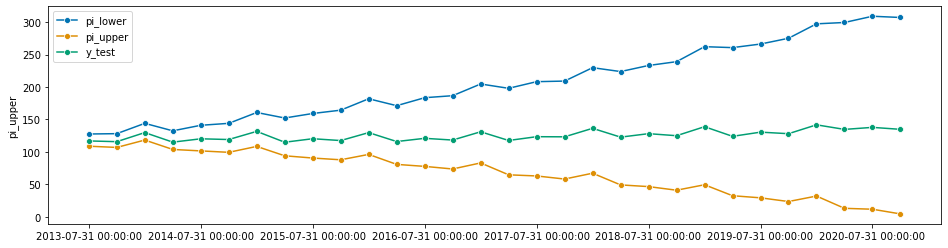

In [23]:
# code here (0.5 pt.)
from sktime.utils.plotting import plot_series

plot_series(upper_int, lower_int , y_test, labels=['pi_lower', 'pi_upper','y_test'])


### 2.4 Interval forecasts ETS(AAM) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

``` pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_AAM=pred_AAM.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```

In [24]:
# code here (0.5 pt.)
pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31')

pred_AAM=pred_AAM.summary_frame(alpha=0.05)

upper_int = pred_AAM['pi_upper']
lower_int = pred_AAM['pi_lower']

Plot interval predictions:

```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='pi_upper'>)

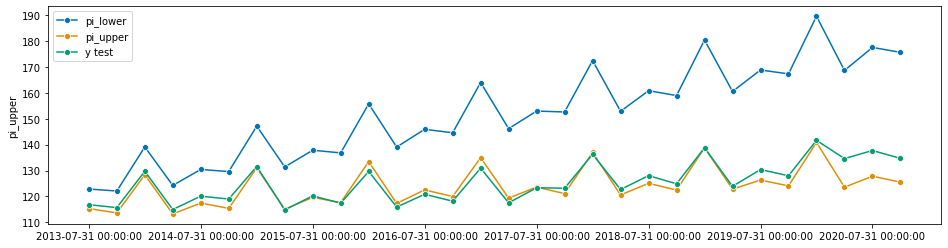

In [25]:
# code here (0.5 pt.)

from sktime.utils.plotting import plot_series
plot_series(upper_int, lower_int , y_test, labels=['pi_lower', 'pi_upper','y test'])

### 2.5 Forecast quality metrics (2 pt.)
[back to contents](#Contents)

Calculate the following metrics for both ETS(MAA) and ETS(AAM) predictions:

$MAE = \frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{n}$

```python
sklearn.metrics.mean_absolute_error
```

In [26]:
# code here (0.5 pt.) MAA

import sklearn

print(sklearn.metrics.mean_absolute_error(y_test, fit_MAA.forecast(steps=30)))

print('MAE_ETS(MAA)'+' = '+ 
      str(sklearn.metrics.mean_absolute_error(y_test, fit_MAA.forecast(steps=30))))

6.394542707159031
MAE_ETS(MAA) = 6.394542707159031


In [27]:
# code here (0.5 pt.) AAM

print(sklearn.metrics.mean_absolute_error(y_test, fit_AAM.forecast(steps=30)))

print('MAE_ETS(AAM)'+' = '+ 
      str(sklearn.metrics.mean_absolute_error(y_test, fit_AAM.forecast(steps=30))))

12.709477432066842
MAE_ETS(AAM) = 12.709477432066842


$MSE = \frac{\sum\limits_{i=1}^n (y_i-\hat{y}_i)^2}{n}$

```python
sklearn.metrics.mean_squared_error
```

In [28]:
# code here (0.5 pt.) MAA

print(sklearn.metrics.mean_squared_error(y_test, fit_MAA.forecast(steps=30)))

print('MSE_ETS(MAA)'+' = '+ 
      str(sklearn.metrics.mean_squared_error(y_test, fit_MAA.forecast(steps=30))))

50.571411842579145
MSE_ETS(MAA) = 50.571411842579145


In [29]:
# code here (0.5 pt.) AAM

print(sklearn.metrics.mean_squared_error(y_test, fit_AAM.forecast(steps=30)))

print('MSE_ETS(AAM)'+' = '+
      str(sklearn.metrics.mean_squared_error(y_test, fit_AAM.forecast(steps=30))))

195.98026292350298
MSE_ETS(AAM) = 195.98026292350298


$MAPE = \frac{100}{n}\frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{y_i}$ 

```python
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```

Create a new function to calculate MAPE

In [30]:
# code here (0.5 pt.)

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



Calculate MAPE:

In [31]:
# code here (0.25 pt.) MAA

print(mean_absolute_percentage_error(y_test, fit_MAA.forecast(steps=30)))

print('MAPE_ETS(MAA)'+' = '+
      str(mean_absolute_percentage_error(y_test, fit_MAA.forecast(steps=30))))

5.0916979807716745
MAPE_ETS(MAA) = 5.0916979807716745


In [32]:
# code here (0.25 pt.) AAM

print(mean_absolute_percentage_error(y_test, fit_AAM.forecast(steps=30)))

print('MAPE_ETS(AAM)'+' = '+
      str(mean_absolute_percentage_error(y_test, fit_AAM.forecast(steps=30))))


9.993770388719089
MAPE_ETS(AAM) = 9.993770388719089


### 2.6 What is the best model according to the metrics above? (1 pt.)

In [33]:
# code here (1 pt.)

print('MAA is the best model, because MAA metrics are alway small as we can see below')

print()

print('MAE_ETS(MAA)'+' = '+ 
      str(sklearn.metrics.mean_absolute_error(y_test, fit_MAA.forecast(steps=30))))

print('MSE_ETS(MAA)'+' = '+ 
      str(sklearn.metrics.mean_squared_error(y_test, fit_MAA.forecast(steps=30))))

print('MAPE_ETS(MAA)'+' = '+
      str(mean_absolute_percentage_error(y_test, fit_MAA.forecast(steps=30))))

print ()

print('MAE_ETS(AAM)'+' = '+ 
      str(sklearn.metrics.mean_absolute_error(y_test, fit_AAM.forecast(steps=30))))

print('MSE_ETS(AAM)'+' = '+
      str(sklearn.metrics.mean_squared_error(y_test, fit_AAM.forecast(steps=30))))

print('MAPE_ETS(AAM)'+' = '+
      str(mean_absolute_percentage_error(y_test, fit_AAM.forecast(steps=30))))



MAA is the best model, because MAA metrics are alway small as we can see below

MAE_ETS(MAA) = 6.394542707159031
MSE_ETS(MAA) = 50.571411842579145
MAPE_ETS(MAA) = 5.0916979807716745

MAE_ETS(AAM) = 12.709477432066842
MSE_ETS(AAM) = 195.98026292350298
MAPE_ETS(AAM) = 9.993770388719089
